In [8]:
# coding: utf-8

from vqaTools.vqa import VQA
from vqaEvaluation.vqaEval import VQAEval
from vgg16 import *
import random
import skimage.io as io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from keras.preprocessing import image
import os
import sys
import json
#sys.path.insert(0, '{}/PythonHelperTools/vqaTools'.format(dataDir))


In [9]:
dataDir		='Data'
versionType ='' # this should be '' when using VQA v2.0 dataset
taskType    ='OpenEnded' # 'OpenEnded' only for v2.0. 'OpenEnded' or 'MultipleChoice' for v1.0
dataType    ='abstract_v002'  # 'mscoco' only for v1.0. 'mscoco' for real and 'abstract_v002' for abstract for v1.0.
dataSubType ='train2015'
annFile     ='{0}/Annotations/{1}{2}_{3}_annotations.json'.format(dataDir, versionType, dataType, dataSubType)
quesFile    ='{0}/Questions/{2}_{1}{3}_{4}_questions.json'.format(dataDir, versionType, taskType, dataType, dataSubType)
imgDir 		= '{0}/Images/scene_img_{1}_{2}/'.format(dataDir, dataType, dataSubType)

In [4]:
# initialize VQA api for QA annotations
vqa = VQA(annFile, quesFile)

loading VQA annotations and questions into memory...
0:00:01.071155
creating index...
index created!


Question: How many pairs of curtains?
Answer 1: 3
Answer 2: 3
Answer 3: 5
Answer 4: 5
Answer 5: 4
Answer 6: 5
Answer 7: 6
Answer 8: 6
Answer 9: 6
Answer 10: 5


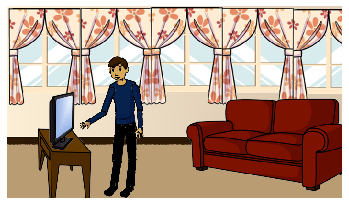

In [10]:
# load and display QA annotations for given question types
"""
All possible quesTypes for abstract and mscoco has been provided in respective text files in ../QuestionTypes/ folder.
"""
annIds = vqa.getQuesIds(quesTypes='how many');   
anns = vqa.loadQA(annIds)
randomAnn = random.choice(anns)
vqa.showQA([randomAnn])
imgId = randomAnn['image_id']
imgFilename = dataType + '_' + dataSubType + '_'+ str(imgId).zfill(12) + '.png'
if os.path.isfile(imgDir + imgFilename):
	I = io.imread(imgDir + imgFilename)
	plt.imshow(I)
	plt.axis('off')
	plt.show()


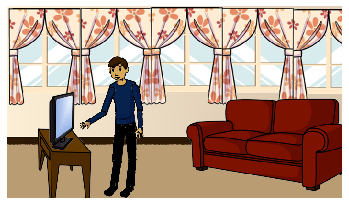

[[[[ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   ...
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]]

  [[ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.0355907   0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   ...
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]]

  [[ 0.          0.          0.         ...  0.          0

In [21]:

model = VGG16(weights='imagenet', include_top=False)

img_path =imgDir + imgFilename
img = image.load_img(img_path, target_size=(700,400,3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
if os.path.isfile(imgDir + imgFilename):
	I = io.imread(imgDir + imgFilename)
	plt.imshow(I)
	plt.axis('off')
	plt.show()
print(features)

Question: Is the woman wearing shoes?
Answer 1: yes
Answer 2: yes
Answer 3: yes
Answer 4: yes
Answer 5: yes
Answer 6: yes
Answer 7: no
Answer 8: yes
Answer 9: yes
Answer 10: yes


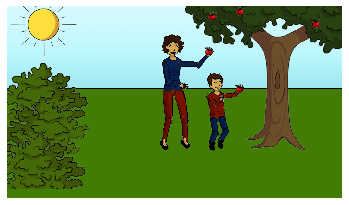

In [179]:
# load and display QA annotations for given answer types
"""
ansTypes can be one of the following
yes/no
number
other
"""
annIds = vqa.getQuesIds(ansTypes='yes/no');   
anns = vqa.loadQA(annIds)
randomAnn = random.choice(anns)
vqa.showQA([randomAnn])
imgId = randomAnn['image_id']
imgFilename = dataType + '_' + dataSubType + '_'+ str(imgId).zfill(12) + '.png'
if os.path.isfile(imgDir + imgFilename):
    I = io.imread(imgDir + imgFilename)
    plt.imshow(I)
    plt.axis('off')
    plt.show()


Question: Does the man have 2 dogs?
Answer 1: yes
Answer 2: yes
Answer 3: yes
Answer 4: yes
Answer 5: yes
Answer 6: yes
Answer 7: yes
Answer 8: yes
Answer 9: yes
Answer 10: yes


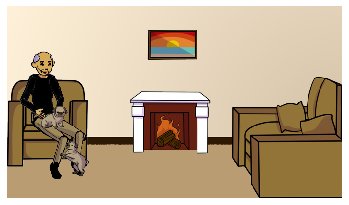

In [176]:
# load and display QA annotations for given images
"""
Usage: vqa.getImgIds(quesIds=[], quesTypes=[], ansTypes=[])
Above method can be used to retrieve imageIds for given question Ids or given question types or given answer types.
"""
ids = vqa.getImgIds()
annIds = vqa.getQuesIds(imgIds=random.sample(ids,5));  
anns = vqa.loadQA(annIds)
randomAnn = random.choice(anns)
vqa.showQA([randomAnn])  
imgId = randomAnn['image_id']
imgFilename = dataType + '_' + dataSubType + '_'+ str(imgId).zfill(12) + '.png'
if os.path.isfile(imgDir + imgFilename):
	I = io.imread(imgDir + imgFilename)
	plt.imshow(I)
	plt.axis('off')
	plt.show()

In [177]:
# set up file names and paths
versionType ='' # this should be '' when using VQA v2.0 dataset
taskTypes    =['MultipleChoice','OpenEnded'] # 'OpenEnded' only for v2.0. 'OpenEnded' or 'MultipleChoice' for v1.0
taskType    = 'OpenEnded'
dataType    ='abstract_v002'  # 'mscoco' only for v1.0. 'mscoco' for real and 'abstract_v002' for abstract for v1.0. 
dataSubType ='val2015'
annFile     ='{0}/Annotations/{1}{2}_{3}_annotations.json'.format(dataDir, versionType, dataType, dataSubType)
quesFile    ='{0}/Questions/{2}_{1}{3}_{4}_questions.json'.format(dataDir, versionType, taskType, dataType, dataSubType)
imgDir 		= '{0}/Images/scene_img_{1}_{2}/'.format(dataDir, dataType, dataSubType)
resultType  ='try0'
fileTypes   = ['results', 'accuracy', 'evalQA', 'evalQuesType', 'evalAnsType'] 

# An example result json file has been provided in './Results' folder.  

[resFile, accuracyFile, evalQAFile, evalQuesTypeFile, evalAnsTypeFile] = ['{}/Results/{}{}_{}_{}_{}_{}.json'.format(dataDir, versionType, taskType, dataType, dataSubType, \
resultType, fileType) for fileType in fileTypes ]  

print(resFile, accuracyFile, evalQAFile, evalQuesTypeFile, evalAnsTypeFile)
# create vqa object and vqaRes object
vqa = VQA(annFile, quesFile)
vqaRes = vqa.loadRes(resFile, quesFile)

# create vqaEval object by taking vqa and vqaRes
vqaEval = VQAEval(vqa, vqaRes, n=2)   #n is precision of accuracy (number of places after decimal), default is 2

Data/Results/OpenEnded_abstract_v002_val2015_try0_results.json Data/Results/OpenEnded_abstract_v002_val2015_try0_accuracy.json Data/Results/OpenEnded_abstract_v002_val2015_try0_evalQA.json Data/Results/OpenEnded_abstract_v002_val2015_try0_evalQuesType.json Data/Results/OpenEnded_abstract_v002_val2015_try0_evalAnsType.json
loading VQA annotations and questions into memory...
0:00:00.548533
creating index...
index created!
Loading and preparing results...     


AssertionError: Results do not correspond to current VQA set. Either results do not have predictions for all question ids in annotation file or there is atleast one question id that does not belong to the question ids in the annotation file.

In [178]:
# evaluate results
"""
If you have a list of question ids on which you would like to evaluate your results, pass it as a list to below function
By default it uses all the question ids in annotation file
"""
VQAEval.evaluate(vqaEval) 

# print accuracies
print ("\n")
print ("Overall Accuracy is: {:.2f}\n".format(vqaEval.accuracy['overall']))
print ("Per Question Type Accuracy is the following:")
for quesType in vqaEval.accuracy['perQuestionType']:
	print ("{} : {:.2f}".format(quesType, vqaEval.accuracy['perQuestionType'][quesType]))
print ("\n")
print ("Per Answer Type Accuracy is the following:")
for ansType in vqaEval.accuracy['perAnswerType']:
        print ("{} : {:.2f}".format(ansType, vqaEval.accuracy['perAnswerType'][ansType]))
print ("\n")
# demo how to use evalQA to retrieve low score result
evals = [quesId for quesId in vqaEval.evalQA if vqaEval.evalQA[quesId]<35]   #35 is per question percentage accuracy
if len(evals) > 0:
	print ('ground truth answers')
	randomEval = random.choice(evals)
	randomAnn = vqa.loadQA(randomEval)
	vqa.showQA(randomAnn)

	print ('\n')
	print ('generated answer (accuracy {:.2f})'.format(vqaEval.evalQA[randomEval]))
	ann = vqaRes.loadQA(randomEval)[0]
	print ("Answer:   {}\n" .format(ann['answer']))

	imgId = randomAnn[0]['image_id']
	imgFilename = 'COCO_' + dataSubType + '_'+ str(imgId).zfill(12) + '.jpg'
	if os.path.isfile(imgDir + imgFilename):
		I = io.imread(imgDir + imgFilename)
		plt.imshow(I)
		plt.axis('off')
		plt.show()

# plot accuracy for various question types
plt.bar(range(len(vqaEval.accuracy['perQuestionType'])), vqaEval.accuracy['perQuestionType'].values(), align='center')
plt.xticks(range(len(vqaEval.accuracy['perQuestionType'])), vqaEval.accuracy['perQuestionType'].keys(), rotation='0',fontsize=10)
plt.title('Per Question Type Accuracy', fontsize=10)
plt.xlabel('Question Types', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.show()

# save evaluation results to ./Results folder
json.dump(vqaEval.accuracy,     open(accuracyFile,     'w'))
json.dump(vqaEval.evalQA,       open(evalQAFile,       'w'))
json.dump(vqaEval.evalQuesType, open(evalQuesTypeFile, 'w'))
json.dump(vqaEval.evalAnsType,  open(evalAnsTypeFile,  'w'))


NameError: name 'vqaEval' is not defined

In [4]:
pip download https://s3.amazonaws.com/cvmlp/vqa/abstract_v002/vqa/Annotations_Train_abstract_v002.zip

  File was already downloaded c:\users\sabbir\documents\vqa-ms\Annotations_Train_abstract_v002.zip
Note: you may need to restart the kernel to use updated packages.


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\sabbir\Anaconda3\envs\myenv\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\sabbir\\AppData\\Local\\Temp\\pip-req-build-nd7rg1ap\\setup.py'"'"'; __file__='"'"'C:\\Users\\sabbir\\AppData\\Local\\Temp\\pip-req-build-nd7rg1ap\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base pip-egg-info
         cwd: C:\Users\sabbir\AppData\Local\Temp\pip-req-build-nd7rg1ap\
    Complete output (5 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\sabbir\Anaconda3\envs\myenv\lib\tokenize.py", line 452, in open
        buffer = _builtin_open(filename, 'rb')
    FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\sabbir\\AppData\\Local\\Temp\\pip-req-build-nd7rg1ap\\setup.py'
    ---

In [7]:
from zipfile import ZipFile
with ZipFile('Annotations_Train_abstract_v002.zip', "r") as zf:
    zf.extractall('Data/')